## **Latar Belakang**

Perusahaan AWS (Amazon Web Services) adalah layanan berbasis cloud yang di sediakan oleh amazon sejak tahun 2002. Amazon yang di kenal perusahaan yang besar untuk membeli buku dan lagu , tetapi sekarang amazon telah menambah layanan dalah hal infrastruktur cloud komputing. 

Salah satu produk milik AWS SaaS (Software as a Service) adalah model perangkat lunak yang berbasis cloud yang mengirimkan aplikasi ke pengguna melalui internet. Dengan Saas tidak perlu lagi memikirkan cara memelihara layanan atau cara mengelola infrastruktur. Pengguna hanya perlu memikirkan cara menggunakan perangkat lunak tersebut. Harga yang diberikan menyesuaikan dengan layanan yang di gunakan.

## **Pernyataan Masalah**

Untuk meningkatkan penjualan produk SaaS, terlampir data penjualan dari perusahaan amazon selama tahun 2020 hingga 2023. Data tersebut perlu di analisa berdasarkan performa penjualan, agar dapat menentukan strategi marketing yang sesuai untuk meningkatan sales. Divisi Data pada perusahaan tersebut akan membuatkan analisa untuk memudahkan divisi marketing dalam membuat strategi yang efektif. **Bagaimana performa penjualan meningkat dengan analisa dari tim data?**

In [512]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import statsmodels.api as sm


---

==**Load Dataset**==

In [513]:
df=pd.read_csv("C:/Users/acern/Documents/Acer nitro 5/Jcds/data set/SaaS-Sales.csv")
df=pd.DataFrame(df)
display(df.head())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [514]:
df['Customer'].unique().sum()

'ChevronPhillips 66Royal Dutch ShellBNP ParibasEngieMicrosoftPfizerToyota MotorHome DepotWells FargoCarrefourCostco WholesaleMcKessonSiemensIntelGlencoreProcter & GambleBanco SantanderPemexSamsung ElectronicsSonyMorgan StanleyBank of America Corp.TescoAvivaMondelez InternationalAbbott LaboratoriesFannie MaeAetnaOracleNissan MotorTyson FoodsVerizon CommunicationsItochuDaimlerWalgreensBoeingValero EnergyNestlePhilip Morris InternationalTrafigura GroupWalmartCisco SystemsPrudential FinancialAmazonGazpromFedExHonda MotorCVS HealthGeneral MotorsState Farm Insurance Cos.ComcastAmerisourceBergenJohnson & JohnsonHonHai Precision IndustryAmerican ExpressJ.P. Morgan Chase & Co.KrogerVolkswagenMerckAT&TAllstateBMWHumanaSprint NextelAllianzUnited Parcel ServiceTargetAirbusCignaGoldman Sachs GroupLowesFord MotorAppleChina National PetroleumConocoPhillipsBoschHSBC HoldingsEnelSyscoMarathon PetroleumUnitedHealth GroupMitsubishiExxon MobilAnthemPetrobrasLukoilCoca-ColaPepsiCoGeneral ElectricBerkshire 

In [515]:
df.groupby('Industry')['Customer'].nunique().reset_index()


,Industry,Customer
0,Communications,5
1,Consumer Products,9
2,Energy,14
3,Finance,20
4,Healthcare,10
5,Manufacturing,11
6,Misc,2
7,Retail,11
8,Tech,13
9,Transportation,4


## **Data Understanding & Data Cleaning**

dfset ini berisi df transaksi dari perusahaan SaaS fiktif yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B). Dalam dfset ini, setiap baris mewakili satu produk dalam suatu transaksi, dan kolom-kolom mencakup:

Berikut adalah dfset Asli: [Sumber](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales)

| No. | Column Name    | Description                                                |
|----|----------------|------------------------------------------------------------|
| 1  | Row ID         | Identifikasi unik untuk setiap transaksi.                  |
| 2  | Order ID       | Identifikasi unik untuk setiap pesanan.                    |
| 3  | Order Date     | Tanggal ketika pesanan ditempatkan.                         |
| 4  | Date Key       | Representasi numerik dari tanggal pesanan (YYYYMMDD).       |
| 5  | Contact Name   | Nama orang yang menempatkan pesanan.                       |
| 6  | Country        | Negara tempat pesanan ditempatkan.                         |
| 7  | City           | Kota tempat pesanan ditempatkan.                            |
| 8  | Region         | Wilayah tempat pesanan ditempatkan.                         |
| 9  | Subregion      | Subwilayah tempat pesanan ditempatkan.                      |
| 10 | Customer       | Nama perusahaan yang menempatkan pesanan.                  |
| 11 | Customer ID    | Identifikasi unik untuk setiap pelanggan.                   |
| 12 | Industry       | Industri yang dimiliki oleh pelanggan.                      |
| 13 | Segment        | Segmen pelanggan (SMB, Strategis, Enterprise, dll.).       |
| 14 | Product        | Produk yang dipesan.                                       |
| 15 | License        | Kunci lisensi untuk produk.                                |
| 16 | Sales          | Jumlah penjualan total untuk transaksi.                    |
| 17 | Quantity       | Jumlah total barang dalam transaksi.                       |
| 18 | Discount       | Diskon yang diterapkan pada transaksi.                     |
| 19 | Profit         | Keuntungan dari transaksi.                                  |


In [516]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9.994000e+03,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,NaN,793,48,262,3,12,99,NaN,10,3,14,9994,NaN,NaN,NaN,NaN
top,NaN,EMEA-2023-100111,9/6/2022,NaN,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,NaN,Finance,SMB,ContactMatcher,16GRM07R1K,NaN,NaN,NaN,NaN
freq,NaN,14,38,NaN,37,2001,922,4219,2507,192,NaN,2127,5191,1842,1,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,2.021803e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.771963,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,1.123898e+04,NaN,NaN,NaN,NaN,NaN,NaN,29.719388,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,2.020010e+07,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,2.021052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1024.000000,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,2.022063e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.000000,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,2.023052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1076.000000,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [518]:
print(f'Jumlah baris dan kolom pada df SaaS :{df.shape}')

Jumlah baris dan kolom pada df SaaS :(9994, 19)


Data order date masih dalam bentuk objek atau string, untuk memudahkan dalam menganalisa berdasarkan waktu perlu di ubah menjadi datatime dan menambah kolom Order month yang berisikan bulan dan tahun agar mudah di kelompokan berdasarkan jumlahnya


In [519]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Sales'] = pd.to_numeric(df['Sales'])
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022-11
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022-11
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022-06
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021-10
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021-10


In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

 **Mengecek apakah terdapat data yang tidak memiliki nilai** 

In [521]:

print(f'{df.isna().sum()}\nData SaaS sales tidak ada NaN atau setiap data memiliki value')

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
Order Month     0
dtype: int64
Data SaaS sales tidak ada NaN atau setiap data memiliki value


**Mengecek data,apakah terdapat data yang masih duplikat**

In [522]:
df.duplicated().sum()

0

**Kolom Date key sama nilainya dengan order date, jadi yang digunakan order date dan kolom date key di hapus.**

In [523]:
df.drop(columns='Date Key',inplace=True)

In [524]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Contact Name', 'Country', 'City',
       'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment',
       'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month'],
      dtype='object')

In [525]:
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates()
    sample_size = min(2, len(unique_values))
    sampled_values = unique_values.sample(sample_size).tolist()
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), sampled_values])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)
print(df.shape)
dfDesc


(9994, 19)


,dataFeatures,dataType,null,unique,uniqueSample
0,Row ID,int64,0,9994,"[3751, 572]"
1,Order ID,object,0,5009,"[EMEA-2022-108616, APJ-2022-120460]"
2,Order Date,datetime64[ns],0,1237,"[2020-12-21 00:00:00, 2020-10-25 00:00:00]"
3,Contact Name,object,0,793,"[Grace Bell, Colin Morgan]"
4,Country,object,0,48,"[Singapore, Poland]"
5,City,object,0,262,"[Medellín, Wellington]"
6,Region,object,0,3,"[APJ, EMEA]"
7,Subregion,object,0,12,"[JAPN, EU]"
8,Customer,object,0,99,"[AT&T, Humana]"
9,Customer ID,int64,0,99,"[1020, 1092]"


## **Outliers**

Cek Outliers pada kolom numerik dengan membuat variable df_num dengan menggunakan boxplot

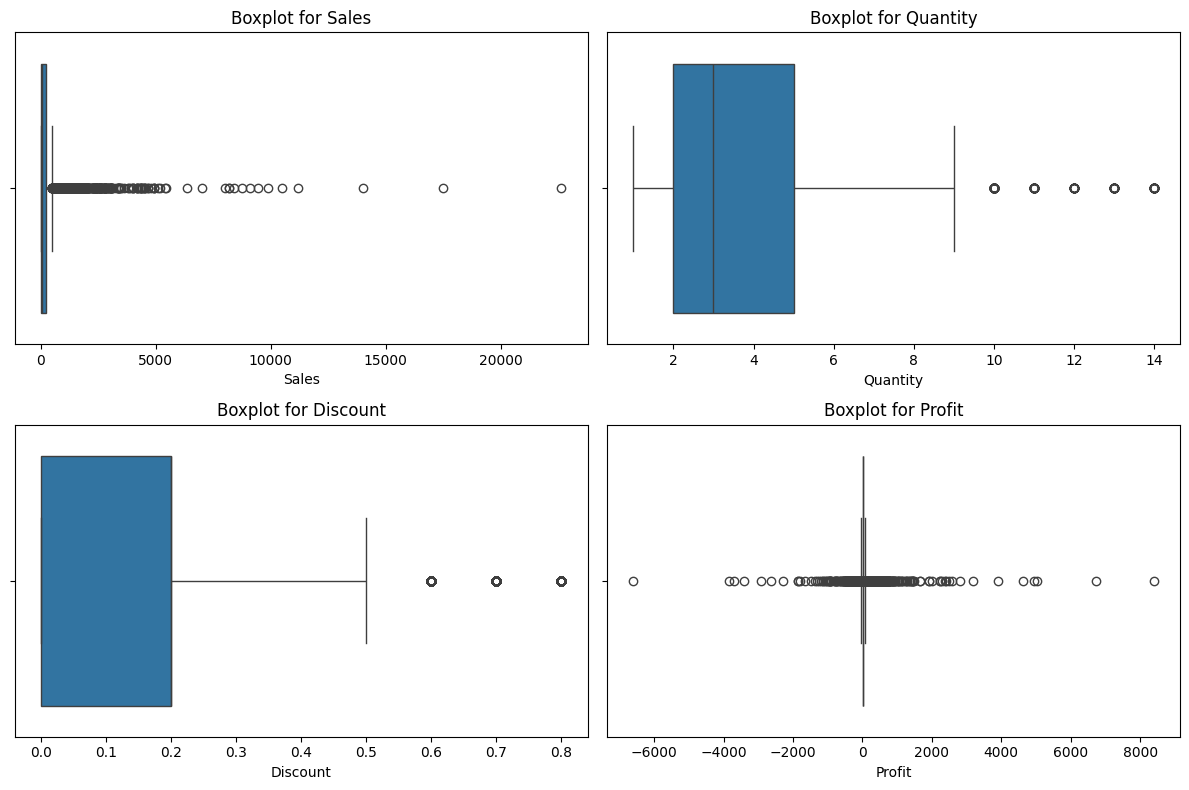

In [526]:


# Pilih kolom numerik dari DataFrame
df_num = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Membuat subplot untuk setiap kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Boxplot untuk Sales
sns.boxplot(ax=axes[0, 0], x=df_num['Sales'])
axes[0, 0].set_title('Boxplot for Sales')

# Boxplot untuk Quantity
sns.boxplot(ax=axes[0, 1], x=df_num['Quantity'])
axes[0, 1].set_title('Boxplot for Quantity')

# Boxplot untuk Discount
sns.boxplot(ax=axes[1, 0], x=df_num['Discount'])
axes[1, 0].set_title('Boxplot for Discount')

# Boxplot untuk Profit
sns.boxplot(ax=axes[1, 1], x=df_num['Profit'])
axes[1, 1].set_title('Boxplot for Profit')

plt.tight_layout()
plt.show()


insight:

- Terdapat outliers pada setiap kolom numerik, namun tidak setiap numerik perlu di hapus. Pada kolom discount dan quantity tidak perlu di hapus karena rentang pada kolom tersebut masih rentang yang sesuai.

- Pada kolom sales dan profit perlu di cari tahu lebih dalam apakah outliers tersebut memiliki informasi. 

## **Analisa outlier**

1. Outlier pada sales
    - Cek terlebih dahulu dari quantity terhadap sales
    - Cek terlebih dahulu dari discount terhadapa sales
    - Hapus outlier pada kolom sales berdasarkan analisa

2. Outlier pada profit
    - Cek terlebih dahulu dari quantity terhadap profit
    - Cek terlebih dahulu dari discount terhadapa profit
    - Hapus outlier pada kolom profit berdasarkan analisa
    

In [527]:
# Hitung nilai IQR untuk 'Sales'
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk mengidentifikasi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hitung jumlah outliers untuk nilai di atas batas atas
upper_outliers_count = (df['Sales'] > upper_bound).sum()

# Hitung jumlah outliers untuk nilai di bawah batas bawah
lower_outliers_count = (df['Sales'] < lower_bound).sum()

# Hitung persentase outliers untuk nilai di atas batas atas
upper_outliers_percentage = (upper_outliers_count / len(df)) * 100

# Hitung persentase outliers untuk nilai di bawah batas bawah
lower_outliers_percentage = (lower_outliers_count / len(df)) * 100

print("Kolom sales")
print(f"Jumlah outliers di atas batas atas: {upper_outliers_count}")
print(f"Persentase outliers di atas batas atas: {upper_outliers_percentage:.2f}%")

print(f"Jumlah outliers di bawah batas bawah: {lower_outliers_count}")
print(f"Persentase outliers di bawah batas bawah: {lower_outliers_percentage:.2f}%")


Kolom sales
Jumlah outliers di atas batas atas: 1167
Persentase outliers di atas batas atas: 11.68%
Jumlah outliers di bawah batas bawah: 0
Persentase outliers di bawah batas bawah: 0.00%


In [528]:
# Hitung nilai IQR untuk 'Sales'
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk mengidentifikasi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hitung jumlah outliers untuk nilai di atas batas atas
upper_outliers_count = (df['Profit'] > upper_bound).sum()

# Hitung jumlah outliers untuk nilai di bawah batas bawah
lower_outliers_count = (df['Profit'] < lower_bound).sum()

# Hitung persentase outliers untuk nilai di atas batas atas
upper_outliers_percentage = (upper_outliers_count / len(df)) * 100

# Hitung persentase outliers untuk nilai di bawah batas bawah
lower_outliers_percentage = (lower_outliers_count / len(df)) * 100

print("Kolom Profit")
print(f"Jumlah outliers di atas batas atas: {upper_outliers_count}")
print(f"Persentase outliers di atas batas atas: {upper_outliers_percentage:.2f}%")

print(f"Jumlah outliers di bawah batas bawah: {lower_outliers_count}")
print(f"Persentase outliers di bawah batas bawah: {lower_outliers_percentage:.2f}%")


Kolom Profit
Jumlah outliers di atas batas atas: 1277
Persentase outliers di atas batas atas: 12.78%
Jumlah outliers di bawah batas bawah: 604
Persentase outliers di bawah batas bawah: 6.04%


## Analisa outlier pada kolom sales

**``A. Kolom Quantity terhadap sales``**

<Axes: xlabel='Quantity', ylabel='Sales'>

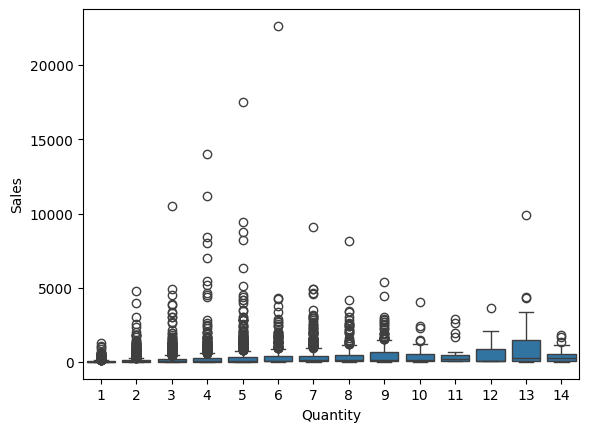

In [529]:
sns.boxplot(data=df_num,x='Quantity',y='Sales')

Analisa boxplot pada quantity
- pada penjualan 10000 terdapat beberapa rentang outliers yang cukup jauh, sehingga perlu dilihat berdasarkan datanya apakah mengandung banyak informasi yang akan berpengaruh terhadap analisa.

In [530]:
outlier_quantity=df[df['Sales']>=10000].sort_values(by='Sales',ascending=False)
outlier_quantity

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month
2697,2698,EMEA-2020-145317,2020-03-18,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.480,6,0.5,-1811.0784,2020-03
6826,6827,APJ-2022-118689,2022-10-03,Nicholas Skinner,India,Mumbai,APJ,IND,Coca-Cola,1021,Consumer Products,Strategic,Alchemy,XRU3UJD9JB,17499.950,5,0.0,8399.9760,2022-10
8153,8154,AMER-2023-140151,2023-03-24,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808,2023-03
2623,2624,EMEA-2023-127180,2023-10-23,Jennifer Payne,United Kingdom,London,EMEA,UKIR,Trafigura Group,1100,Finance,Enterprise,Alchemy,KPFKTCVVDH,11199.968,4,0.2,3919.9888,2023-10
4190,4191,APJ-2023-166709,2023-11-18,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,1060,Retail,SMB,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856,2023-11


In [531]:
outlier_quantity.shape

(5, 19)

Insight:

- Terdapat outliers yang rentang cukup jauh berdasarkan berdasarkan quantity terhadap sales. Pada rentang penjualan 10.000 lebih berdasarkan quantity

- jumlah baris outlier yang di atas penjualan 10000 adalah 5 baris

**``B. Kolom Discount terhadap sales``**

<Axes: xlabel='Discount', ylabel='Sales'>

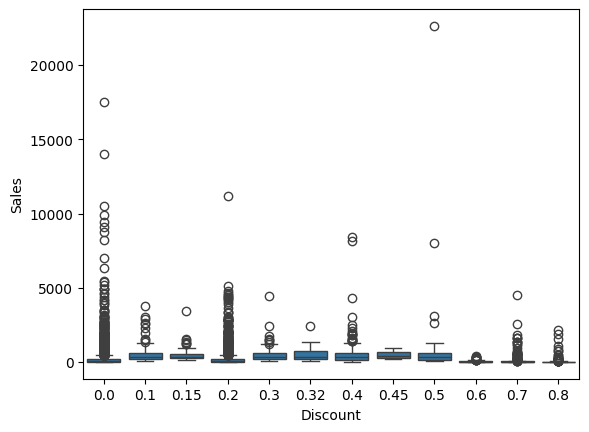

In [532]:
sns.boxplot(data=df_num,x='Discount',y='Sales')

Analisa boxplot Discount terhadap sales
- pada penjualan 6000 terdapat beberapa rentang outliers yang cukup jauh, sehingga perlu dilihat berdasarkan datanya apakah mengandung banyak informasi yang akan berpengaruh terhadap analisa.

In [533]:
outlier_discount=df[df['Sales']>=6000].sort_values(by='Discount',ascending=False)
outlier_discount



,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month
683,684,EMEA-2023-168116,2023-11-05,Emily Fisher,Sweden,Gothenburg,EMEA,NOR,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,BT5A3EPA0H,7999.980,4,0.5,-3839.9904,2023-11
2697,2698,EMEA-2020-145317,2020-03-18,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.480,6,0.5,-1811.0784,2020-03
165,166,APJ-2020-139892,2020-09-08,Melanie Davidson,Japan,Osaka,APJ,JAPN,Nissan Motor,1098,Transportation,SMB,Big Ol Database,SKNAWPG4VV,8159.952,8,0.4,-1359.9920,2020-09
6425,6426,EMEA-2022-143714,2022-05-24,Alexander Langdon,France,Paris,EMEA,EU-WEST,BMW,1039,Manufacturing,SMB,Alchemy,C76HNU0077,8399.976,4,0.4,1119.9968,2022-05
2623,2624,EMEA-2023-127180,2023-10-23,Jennifer Payne,United Kingdom,London,EMEA,UKIR,Trafigura Group,1100,Finance,Enterprise,Alchemy,KPFKTCVVDH,11199.968,4,0.2,3919.9888,2023-10
509,510,EMEA-2021-145352,2021-03-16,Eric Forsyth,Finland,Helsinki,EMEA,NOR,Lukoil,1044,Energy,SMB,ContactMatcher,B8THW7YZWV,6354.950,5,0.0,3177.4750,2021-03
2505,2506,AMER-2020-143917,2020-07-25,Trevor Langdon,United States,Los Angeles,AMER,NAMER,Target,1085,Retail,SMB,Support,VW5YAKBYXO,8187.650,5,0.0,327.5060,2020-07
4098,4099,EMEA-2020-116904,2020-09-23,Deirdre McDonald,Luxembourg,Luxembourg,EMEA,EU-WEST,Anthem,1029,Healthcare,SMB,ContactMatcher,TBTJ3FL8AN,9449.950,5,0.0,4630.4755,2020-09
4190,4191,APJ-2023-166709,2023-11-18,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,1060,Retail,SMB,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856,2023-11
4277,4278,AMER-2022-107440,2022-04-17,Kevin Wilkins,Argentina,Buenos Aires,AMER,LATAM,Lowes,1060,Retail,Strategic,Big Ol Database,N62XSQRABC,9099.930,7,0.0,2365.9818,2022-04


In [534]:
outlier_discount.shape

(15, 19)

Insight:

- Terdapat outliers yang rentang cukup jauh berdasarkan berdasarkan discount terhadap sales. Pada rentang penjualan 6000 lebih berdasarkan discount.

- jumlah baris outlier yang di atas penjualan 6000 adalah 15 baris.

**``C. Hapus Outlier pada sales``**

- Dari hasil analisa pada tiap boxplot, Maka di ambilah rentang penjualan yang diatas 6000.
- Jika dari semua outlier di hapus, maka analisa terhadap penjualan yang nilainya besar akan hilang.
- Yang terdampak pada kolom discount pada jenis discount 0.5, 0.4, 0.2, dan 0.
- Yang terdampak pada kolom quantity pada jenis quantity 6, 5, 4, dan 3.

In [535]:
df=df[df['Sales']<=6000]
df.shape

(9979, 19)

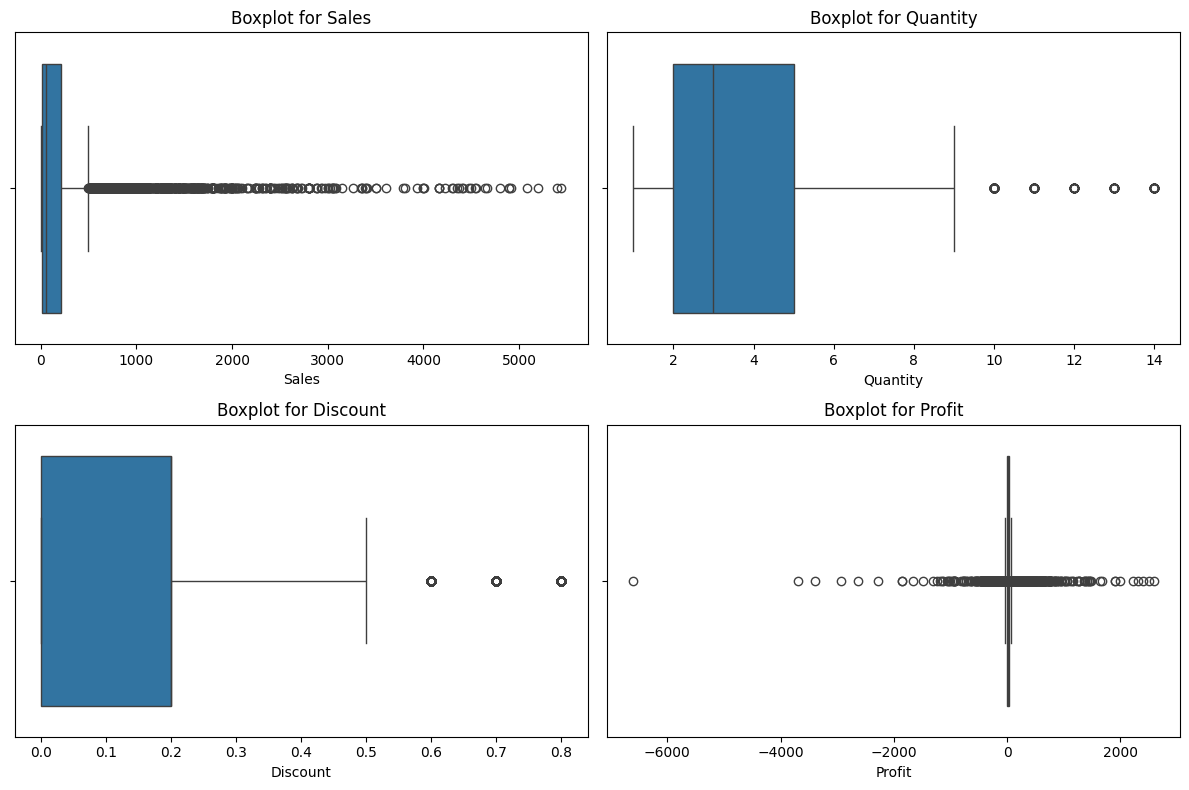

In [536]:


# Pilih kolom numerik dari DataFrame
df_num = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Membuat subplot untuk setiap kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Boxplot untuk Sales
sns.boxplot(ax=axes[0, 0], x=df_num['Sales'])
axes[0, 0].set_title('Boxplot for Sales')

# Boxplot untuk Quantity
sns.boxplot(ax=axes[0, 1], x=df_num['Quantity'])
axes[0, 1].set_title('Boxplot for Quantity')

# Boxplot untuk Discount
sns.boxplot(ax=axes[1, 0], x=df_num['Discount'])
axes[1, 0].set_title('Boxplot for Discount')

# Boxplot untuk Profit
sns.boxplot(ax=axes[1, 1], x=df_num['Profit'])
axes[1, 1].set_title('Boxplot for Profit')

plt.tight_layout()
plt.show()


## Analisa outlier pada kolom profit.

**``A. Kolom Quantity terhadap profit``**

<Axes: xlabel='Quantity', ylabel='Profit'>

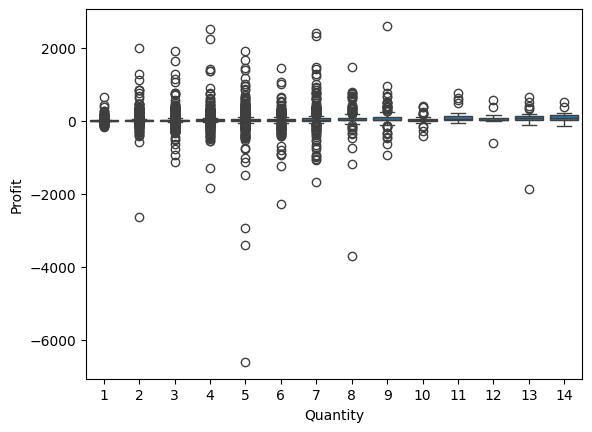

In [537]:
sns.boxplot(data=df_num,x='Quantity',y='Profit')

Analisa boxplot Quantity terhadap profit.
- pada profit di bawah -2000 terdapat rentang outliers yang cukup jauh, maka yang rentangnya cukup jauh akan di hapus.

In [538]:
outlierprofit_quantity = df[(df['Profit'] <= -2000)].sort_values(by='Quantity', ascending=False)
outlierprofit_quantity

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month
9774,9775,APJ-2020-169019,2020-07-26,Lily Bond,Japan,Osaka,APJ,JAPN,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928,2020-07
5310,5311,APJ-2023-131254,2023-11-20,Carl Langdon,Japan,Tokyo,APJ,JAPN,Itochu,1032,Finance,SMB,ContactMatcher,68L961MMX4,1525.188,6,0.8,-2287.7820,2023-11
3011,3012,EMEA-2023-134845,2023-04-18,Joshua Vaughan,Russia,Moscow,EMEA,EU-EAST,FedEx,1036,Transportation,Enterprise,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.9800,2023-04
4991,4992,APJ-2023-122714,2023-12-08,Ruth Vaughan,Australia,Sydney,APJ,ANZ,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,WWN9Y458G2,1889.990,5,0.8,-2929.4845,2023-12
7772,7773,AMER-2022-108196,2022-11-26,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,PM66ENV0DN,4499.985,5,0.7,-6599.9780,2022-11
3151,3152,AMER-2021-147830,2021-12-15,Sean Rees,Mexico,Monterrey,AMER,LATAM,Walgreens,1095,Retail,SMB,Big Ol Database,PUDE08EA7R,1799.994,2,0.7,-2639.9912,2021-12


In [539]:
outlierprofit_quantity.shape

(6, 19)

Insight.
- pada profit di bawah -2000 terdapat rentang outliers yang cukup jauh, maka yang rentangnya cukup jauh akan di hapus.
- jumlah baris pada profit di bawah -2000 terdapat 6 baris.

**``B. Kolom Discount terhadap profit.``**

<Axes: xlabel='Quantity', ylabel='Profit'>

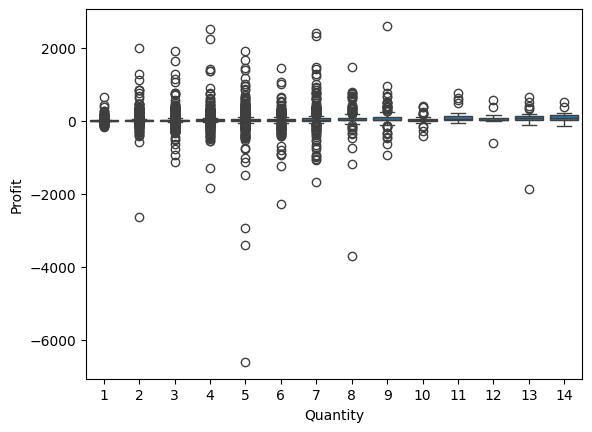

In [540]:
sns.boxplot(data=df_num,x='Quantity',y='Profit')

Analisa boxplot discount terhadap profit.
- pada profit di bawah -2000 terdapat rentang outliers yang cukup jauh, maka yang rentangnya cukup jauh akan di hapus.

In [541]:
outlierprofit_discount = df[(df['Profit'] <= -2000)].sort_values(by='Discount', ascending=False)
outlierprofit_discount

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Order Month
4991,4992,APJ-2023-122714,2023-12-08,Ruth Vaughan,Australia,Sydney,APJ,ANZ,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,WWN9Y458G2,1889.990,5,0.8,-2929.4845,2023-12
5310,5311,APJ-2023-131254,2023-11-20,Carl Langdon,Japan,Tokyo,APJ,JAPN,Itochu,1032,Finance,SMB,ContactMatcher,68L961MMX4,1525.188,6,0.8,-2287.7820,2023-11
9774,9775,APJ-2020-169019,2020-07-26,Lily Bond,Japan,Osaka,APJ,JAPN,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928,2020-07
3011,3012,EMEA-2023-134845,2023-04-18,Joshua Vaughan,Russia,Moscow,EMEA,EU-EAST,FedEx,1036,Transportation,Enterprise,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.9800,2023-04
3151,3152,AMER-2021-147830,2021-12-15,Sean Rees,Mexico,Monterrey,AMER,LATAM,Walgreens,1095,Retail,SMB,Big Ol Database,PUDE08EA7R,1799.994,2,0.7,-2639.9912,2021-12
7772,7773,AMER-2022-108196,2022-11-26,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,PM66ENV0DN,4499.985,5,0.7,-6599.9780,2022-11


In [542]:
outlierprofit_discount.shape

(6, 19)

Insight.
- pada quantity di bawah -2000 terdapat rentang outliers yang cukup jauh, maka yang rentangnya cukup jauh akan di hapus.
- jumlah baris pada quantity di bawah -2000 terdapat 6 baris.

**``C. Hapus Outlier pada profit.``**

- Dari hasil analisa pada tiap boxplot, Maka di ambilah rentang penjualan yang dibawah -2000.
- Jika dari semua outlier di hapus, maka analisa terhadap profit yang minusnya besar akan hilang.
- Yang terdampak pada kolom discount pada jenis discount 0.8 dan 0.7.
- Yang terdampak pada kolom quantity pada jenis quantity 6, 5, 8, dan 2.

In [543]:
df=df[df['Profit']>=-2000]
df.shape

(9973, 19)

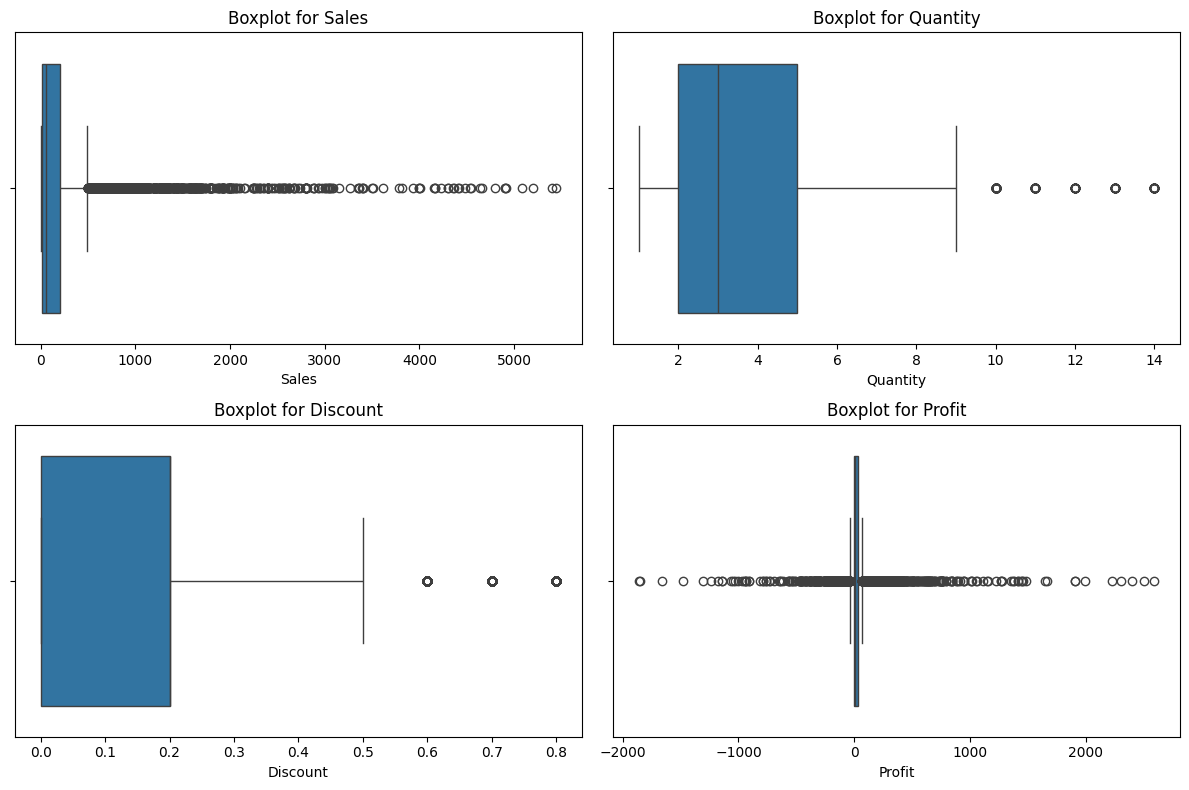

In [544]:


# Pilih kolom numerik dari DataFrame
df_num = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Membuat subplot untuk setiap kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Boxplot untuk Sales
sns.boxplot(ax=axes[0, 0], x=df_num['Sales'])
axes[0, 0].set_title('Boxplot for Sales')

# Boxplot untuk Quantity
sns.boxplot(ax=axes[0, 1], x=df_num['Quantity'])
axes[0, 1].set_title('Boxplot for Quantity')

# Boxplot untuk Discount
sns.boxplot(ax=axes[1, 0], x=df_num['Discount'])
axes[1, 0].set_title('Boxplot for Discount')

# Boxplot untuk Profit
sns.boxplot(ax=axes[1, 1], x=df_num['Profit'])
axes[1, 1].set_title('Boxplot for Profit')

plt.tight_layout()
plt.show()


## **Data analysis**

Agar mempermudah tim marketing untuk membuat meningkatkan penjualan maka ada beberapa analisa yang di butuhkan tim marketing antara lain:

1. Kolom apa yang memiliki hubungan terhadap sales?
    - Membuat tabel baru berdasarkan order date dan customer id (untuk mempermudah analisa performa penjualan).
    - Melihat korelasi pada data numerik.
    - Analisa pada Industry dan Customer berdasarkan penjualan.
    - Analisa pada Product dengan Industry dan product dengan Customer berdasarkan penjualan.
    
2. Berdasarkan data kapan waktu penjualan meningkat?
    - Melihat tren penjualan dari waktu ke waktu.
    - Melihat tren penjualan dari kuartal.
    - Menentukan bulan dengan penjualan tertinggi dan terendah.
    - Menentukan kuartal dengan penjualan tertinggi dan terendah.
    - Identifikasi pola musiman dalam penjualan.





### **Membuat tabel baru berdasarkan order date dan customer id**

In [545]:
df_sales_timeseries=df.groupby(['Customer ID','Order Month']).agg(
    freq_trx= pd.NamedAgg(column='Order ID',aggfunc='nunique'),
    total_qty= pd.NamedAgg(column='Quantity',aggfunc='sum'),
    total_profit= pd.NamedAgg(column='Profit',aggfunc='sum'),
    total_sales=pd.NamedAgg(column='Sales',aggfunc='sum'),
).reset_index()

In [546]:
df_sales_timeseries

,Customer ID,Order Month,freq_trx,total_qty,total_profit,total_sales
0,1001,2020-04,2,17,232.7869,552.472
1,1001,2020-05,1,8,24.7992,287.456
2,1001,2020-08,1,14,51.1464,163.620
3,1001,2020-10,1,4,18.5280,49.408
4,1001,2020-12,2,26,-159.9995,368.220
...,...,...,...,...,...,...
2810,1101,2023-04,1,8,-32.2192,198.272
2811,1101,2023-05,2,8,55.0410,217.530
2812,1101,2023-08,2,8,-46.4537,248.390
2813,1101,2023-10,1,14,-18.1860,254.604


hasil dari pengelompokan ini memberikan ringkasan statistik untuk setiap kombinasi pelanggan dan bulan pesanan, menunjukkan seberapa sering pelanggan tersebut bertransaksi, total jumlah barang yang dibeli, total keuntungan yang dihasilkan, dan total penjualan yang dicapai. Berikut penjelasan tiap kolom:

1. freq_trx: Jumlah transaksi unik (Order ID yang berbeda) untuk setiap kombinasi pelanggan ('Customer ID') dan bulan pesanan ('Order Month').

2. total_qty: Jumlah total barang (Quantity) untuk setiap kombinasi pelanggan dan bulan pesanan.
3. total_profit: Total keuntungan (Profit) untuk setiap kombinasi pelanggan dan bulan pesanan.
4. total_sales: Total penjualan (Sales) untuk setiap kombinasi pelanggan dan bulan pesanan.



## **Crosstab pada ``data numerik``**

Pada analisa ini mengetahui apakah quantity, profit, discount, dan nilai numerikanya mempunyai hubungan.


In [547]:
corr_num=df_sales_timeseries.corr(method='spearman',numeric_only=True)


Text(0.5, 1.0, 'Correlation of Numeric Values')

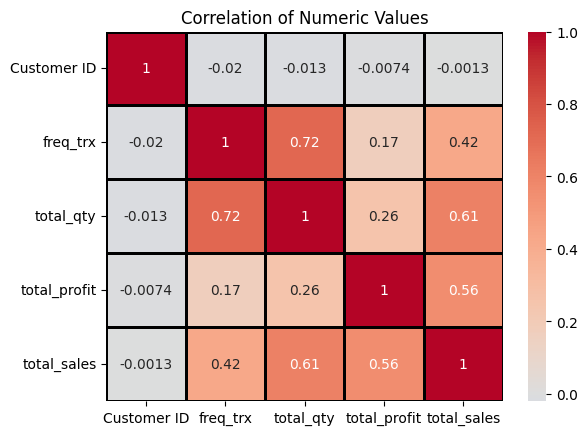

In [548]:
# Melihat korelasi dengan visualisasi heatmap
# mask = np.triu(np.ones_like(corr_num, dtype=bool))

sns.heatmap(data=df_sales_timeseries.corr(numeric_only=True),    
            annot=True,                        
            cmap= 'coolwarm',                   
            center = 0,
            linecolor = 'black',
            linewidths = 1)
            # mask=mask)                       

plt.title('Correlation of Numeric Values')

Insight:

- Total Quantity (total_qty) vs. Lainnya:

total_qty memiliki korelasi positif yang kuat dengan freq_trx (0.72), total_sales (0.61), dan total_profit (0.26). Ini menunjukkan bahwa jumlah total barang yang dibeli oleh pelanggan berkorelasi positif dengan frekuensi transaksi, total penjualan, dan total keuntungan.
- Total Sales (total_sales) vs. Lainnya:

total_sales memiliki korelasi positif yang kuat dengan freq_trx (0.42) dan total_qty (0.61). Ini menunjukkan bahwa pelanggan yang sering bertransaksi dan membeli dalam jumlah besar cenderung memiliki total penjualan yang lebih tinggi.
- Frequency Transaksi (freq_trx) vs. Lainnya:

freq_trx memiliki korelasi positif yang cukup kuat dengan total_qty (0.72), total_sales (0.42), dan korelasi yang moderat dengan total_profit (0.17). Ini menunjukkan bahwa pelanggan yang sering bertransaksi cenderung memiliki jumlah total pembelian dan penjualan yang lebih tinggi.

### **Analisa pada ``Industry dan Customer berdasarkan penjualan.``**

C:\Users\acern\AppData\Local\Temp\ipykernel_5292\1304970893.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x='Industry', y='Sales', palette='viridis')


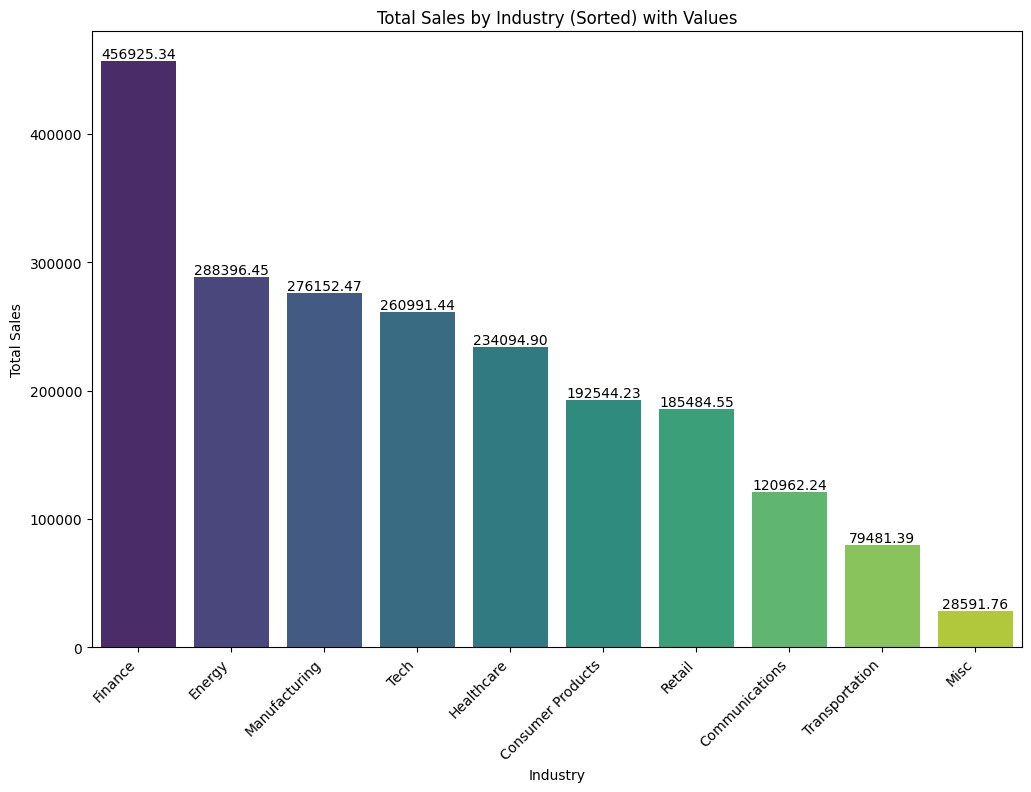

In [549]:
# Mengelompokkan data dan menghitung total penjualan per industri
df_grouped = df.groupby('Industry')['Sales'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan 'Sales' secara menurun
df_sorted = df_grouped.sort_values(by='Sales', ascending=False)

# Membuat barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=df_sorted, x='Industry', y='Sales', palette='viridis')

# Menambahkan nilai pada setiap bar
for index, value in enumerate(df_sorted['Sales']):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Industry')
plt.ylabel('Total Sales')
plt.title('Total Sales by Industry (Sorted) with Values')
plt.xticks(rotation=45, ha='right')
plt.show()

Insight:

Ringkasan ini memberikan gambaran tentang kontribusi relatif dari masing-masing industri terhadap total penjualan. Industri Finance mendominasi dengan total penjualan yang jauh lebih tinggi dibandingkan industri lainnya, sementara industri Misc memiliki kontribusi penjualan yang paling rendah.

- Penjualan tertinggi dengan total sekitar 456,925.34 pada industri finance.
- Penjualan terendah dengan total sekitar 28,591.76 pada industri misc
- Jika ingin memperluas penjualan, pada segi bidang industri energi, manufaktur, tech dan healthcare.

**melihat lebih dalam lagi industri dan customer apa yang memiliki nilai sales yang signifikan**

In [550]:
# df_ct = pd.crosstab(df['Product'], df['Sales'])
cross_cust = pd.crosstab(index=df['Industry'], columns=df['Customer'], values=df['Sales'].round(2), aggfunc='sum')
# cross_table = pd.DataFrame(cross_table)
cross_cust = cross_cust.stack().sort_values(ascending=False)
# cross_table = cross_table.loc[(cross_table.index.get_level_values('Product') != 'Sales') & (cross_table.index.get_level_values('Industry') != 'Sales')]  # Menghilangkan total di level Product dan Industry
cross_cust.head(10)


Industry           Customer             
Finance            Allianz                  42904.18
Manufacturing      Ford Motor               42003.08
Finance            Bank of America Corp.    41255.96
Consumer Products  Tyson Foods              40326.32
Healthcare         AmerisourceBergen        39234.78
Finance            BNP Paribas              37543.80
Manufacturing      Siemens                  36008.38
Finance            Allstate                 35441.65
Healthcare         UnitedHealth Group       35201.61
Manufacturing      Volkswagen               35200.44
dtype: float64

Insight:
1. Top Customers in Each Industry:

    - Finance: Allianz, Bank of America Corp., BNP Paribas, Allstate
    - Manufacturing: Ford Motor, Siemens, Volkswagen
    - Consumer Products: Tyson Foods
    - Healthcare: AmerisourceBergen, UnitedHealth Group

Analisis: Beberapa industri memiliki beberapa pelanggan utama yang memberikan kontribusi signifikan terhadap total penjualan di industri tersebut. Pelanggan-pelanggan ini dapat menjadi fokus dalam strategi pemasaran dan pelayanan pelanggan.

2. Potensi Pertumbuhan:

    - Meskipun Finance mendominasi total penjualan, sektor Manufacturing memiliki beberapa pelanggan (Ford Motor, Siemens, Volkswagen) dengan penjualan yang cukup tinggi. Ini menunjukkan potensi pertumbuhan dan diversifikasi dalam industri Manufacturing.

3. Pengelompokan Pelanggan:

    - Beberapa pelanggan terkait dengan lebih dari satu industri (misalnya, Allianz dan Allstate terkait dengan Finance, Ford Motor dan Siemens terkait dengan Manufacturing). Ini dapat menunjukkan adanya peluang untuk menjalin kerjasama lintas industri atau menyediakan layanan yang mencakup berbagai sektor.

4. Diversifikasi Industri:

    - Perusahaan memiliki pelanggan yang tersebar di berbagai industri, termasuk Finance, Manufacturing, Consumer Products, dan Healthcare. Diversifikasi ini dapat membantu mengurangi risiko yang terkait dengan bergantung pada satu industri tertentu.



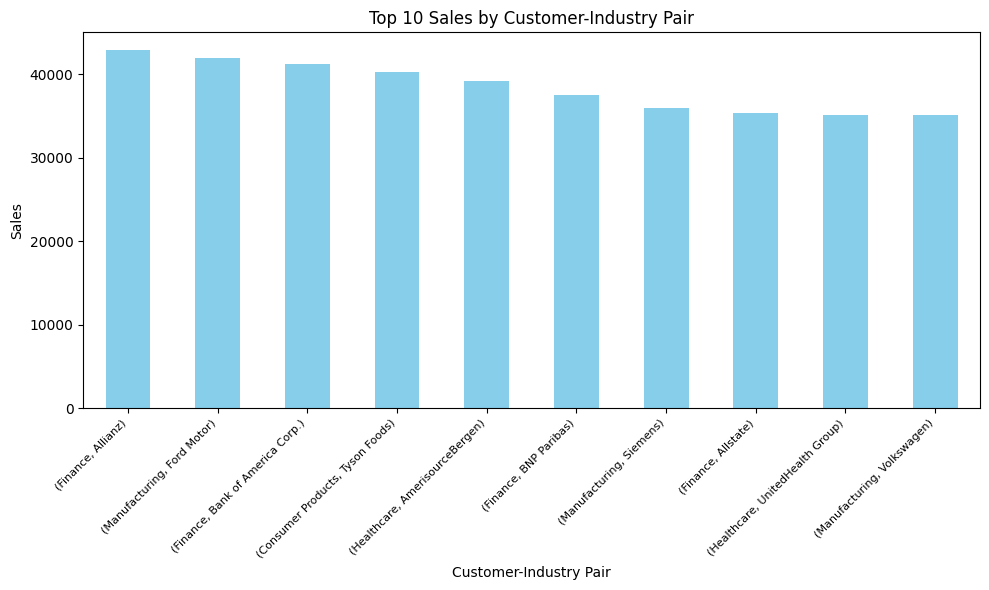

In [551]:
import matplotlib.pyplot as plt

# Koding yang telah Anda buat
cross_cust = pd.crosstab(index=df['Industry'], columns=df['Customer'], values=df['Sales'].round(2), aggfunc='sum')
cross_cust = cross_cust.stack().sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 6))
cross_cust.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Customer-Industry Pair')
plt.ylabel('Sales')
plt.title('Top 10 Sales by Customer-Industry Pair')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()


**Uji normalitas**

In [552]:
from scipy.stats import normaltest
stats, pvalue = normaltest(df['Sales'])

# Menampilkan hasil uji dengan membulatkan nilai statistik dan p-value
print(f'D_agustino Statistic: {round(stats, 4)}')
print(f'P-value: {round(pvalue, 4)}')

# Menetapkan tingkat signifikansi (alpha)
alpha = 0.05

# Menentukan apakah kita dapat menolak hipotesis nol
if pvalue >= alpha:
    # Hipotesis Nol (Ho): Data terdistribusi normal
    print(f'P-value={round(pvalue, 4)} >= {alpha}, gagal menolak Ho. Kita anggap data terdistribusi normal.')
else:
    # Hipotesis Alternatif (Ha): Data tidak terdistribusi normal
    print(f'P-value={round(pvalue, 4)} < {alpha}, berhasil menolak Ho. Kita anggap data tidak terdistribusi normal.')


D_agustino Statistic: 10059.8007
P-value: 0.0
P-value=0.0 < 0.05, berhasil menolak Ho. Kita anggap data tidak terdistribusi normal.


In [553]:
import scipy.stats as stats
statistic, p_value = stats.kruskal(*[group['Sales'] for name, group in df.groupby(['Customer', 'Industry'])])

# Menampilkan hasil uji
print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

# Menentukan apakah terdapat perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara setidaknya dua kelompok.")
else:
    print("Tidak terdapat perbedaan signifikan antara kelompok.")

Kruskal-Wallis Statistic: 106.544758064393
P-value: 0.2608399727188159
Tidak terdapat perbedaan signifikan antara kelompok.


### **Analisa pada ``Product dengan Industry dan product dengan Customer berdasarkan penjualan.``**

C:\Users\acern\AppData\Local\Temp\ipykernel_5292\2772950114.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(
C:\Users\acern\AppData\Local\Temp\ipykernel_5292\2772950114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


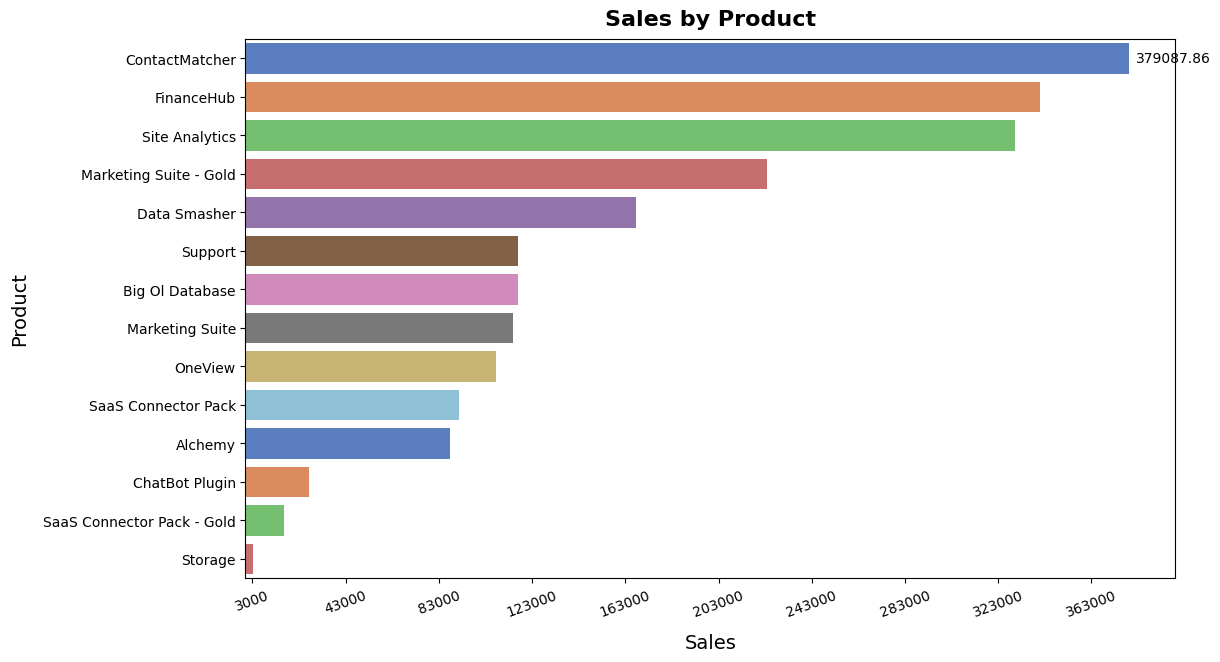

In [554]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=df,
    y="Product",
    x="Sales",
    ci=0,
    palette="muted",  
    estimator="sum",
    order=df.groupby(by='Product')[['Sales']].sum().sort_values("Sales", ascending=False).index,
)
container = ax.containers[0]
profit_values = [f'{x:.2f}' for x in container.datavalues]
ax.bar_label(container,   labels=profit_values, padding=5)
plt.title("Sales by Product", size=16, pad=10, fontweight='bold')
plt.xlabel("Sales", size=14, labelpad=10)
plt.ylabel("Product", size=14, labelpad=10)
plt.xticks(range(3000, 400001, 40000),rotation=20)
plt.show()


Insight:

1. Produk "ContactMatcher" merupakan kontributor terbesar terhadap penjualan dengan total penjualan sebesar 379,087.86.

2. Produk "FinanceHub" menempati peringkat kedua dengan total penjualan sebesar 340,935.42, diikuti oleh "Site Analytics" dengan total penjualan 330,007.05.

3. Produk dengan penjualan tinggi seperti "ContactMatcher" dan "FinanceHub" dapat menjadi fokus strategi pemasaran lebih lanjut atau pengembangan produk untuk meningkatkan pangsa pasar.

4. Produk dengan penjualan rendah dapat dievaluasi untuk menentukan apakah perlu ditingkatkan, dihentikan, atau mendapatkan perhatian lebih lanjut dalam strategi pemasaran.

5. Pada product site analytics dan marketing suit memiliki potensi untuk di kembangkan.

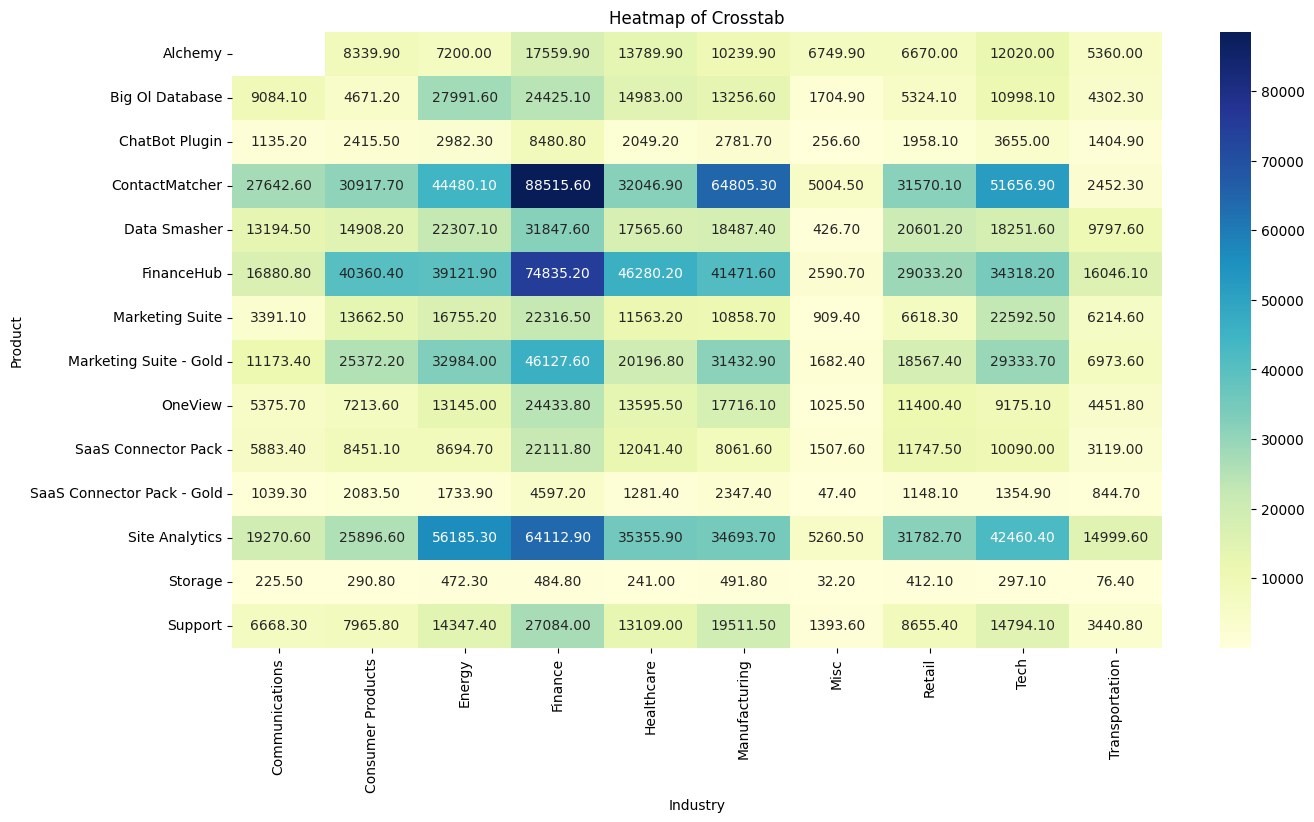

In [555]:
cross_table = pd.crosstab(index=df['Product'], columns=df['Industry'], values=df['Sales'].round(1), aggfunc='sum')
cross_table = cross_table.stack().sort_values(ascending=False)

cross_table = cross_table.loc[(cross_table.index.get_level_values('Product') != 'Sales') & (cross_table.index.get_level_values('Industry') != 'Sales')]

# Konversi cross_table menjadi bentuk matriks
heatmap_data = cross_table.unstack()

# Membuat heatmap menggunakan Seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="0.2f", cbar=True)
plt.title('Heatmap of Crosstab')
plt.show()


insight:
1. Produk dengan Nilai Tertinggi: ContactMatcher dan FinanceHub memiliki nilai total tertinggi. Ini menunjukkan bahwa produk-produk ini memiliki total nilai (jumlah) yang besar, dihitung berdasarkan variabel "Value". Ini menunjukkan bahwa produk ini memiliki dampak signifikan pada industri keuangan.

2. Potensi Pertumbuhan dan Diversifikasi:

- Sektornya Tech memiliki kontribusi penjualan yang cukup tinggi dari produk "ContactMatcher". Mungkin ada peluang untuk meningkatkan penjualan di sektor ini atau mengembangkan produk lebih lanjut untuk pasar ini.

- Produk "FinanceHub" memiliki kontribusi penjualan di beberapa sektor, termasuk Finance, Consumer Product, Energy, Healthcare, dan Manufacturing. Terdapat potensi untuk melakukan persebaran lebih luas lagi karena melihat penjualan pada sektor tersebut cukup tinggi.

- Produk "Site Analytics" memiliki kontribusi penjualan di beberapa sektor, termasuk Finance, Energy, Tech, Healthcare, dan Manufacturing. Mungkin ada peluang untuk memperluas atau menyesuaikan fitur produk untuk memenuhi kebutuhan beragam pelanggan.


In [556]:
cross_pro = pd.crosstab(index=df['Product'], columns=df['Customer'], values=df['Sales'].round(1), aggfunc='sum')
cross_pro = cross_pro.stack().sort_values(ascending=False)
cross_pro.head(15)



Product         Customer      
ContactMatcher  Morgan Stanley    13242.0
                Allstate          12927.1
                Walt Disney       11593.2
FinanceHub      Siemens           10783.8
Site Analytics  ConocoPhillips    10321.2
FinanceHub      Allianz            9655.1
ContactMatcher  HSBC Holdings      9499.8
                Ford Motor         9445.5
                Siemens            9349.1
                Airbus             9259.7
                Apple              8692.7
                PepsiCo            8358.5
Site Analytics  Kroger             7940.9
ContactMatcher  Lukoil             7859.8
FinanceHub      PepsiCo            7842.8
dtype: float64

insight:

1. Kontribusi Penjualan Berdasarkan Produk:

    - Produk "ContactMatcher" memiliki kontribusi penjualan tertinggi, terutama dari pelanggan Morgan Stanley, Allstate, dan Walt Disney.

    - Produk "FinanceHub" memiliki kontribusi penjualan yang signifikan, terutama dari pelanggan Siemens, Allianz, dan PepsiCo.
    - Produk "Site Analytics" memiliki kontribusi penjualan dari pelanggan ConocoPhillips dan Kroger.

2. Pelanggan-pelanggan utama seperti Morgan Stanley, Allstate, Walt Disney, Siemens, dan Allianz memiliki potensi untuk menjadi mitra strategis atau mendapatkan perhatian khusus dalam strategi penjualan dan layanan.

3. Memahami pelanggan yang memberikan kontribusi tinggi dapat membantu dalam menentukan potensi pertumbuhan dan area di mana layanan dapat ditingkatkan untuk meningkatkan kepuasan pelanggan.



### **Analisa penjualan berdasarkan order per bulan dan per kuartal**

C:\Users\acern\AppData\Local\Temp\ipykernel_5292\2155291581.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(


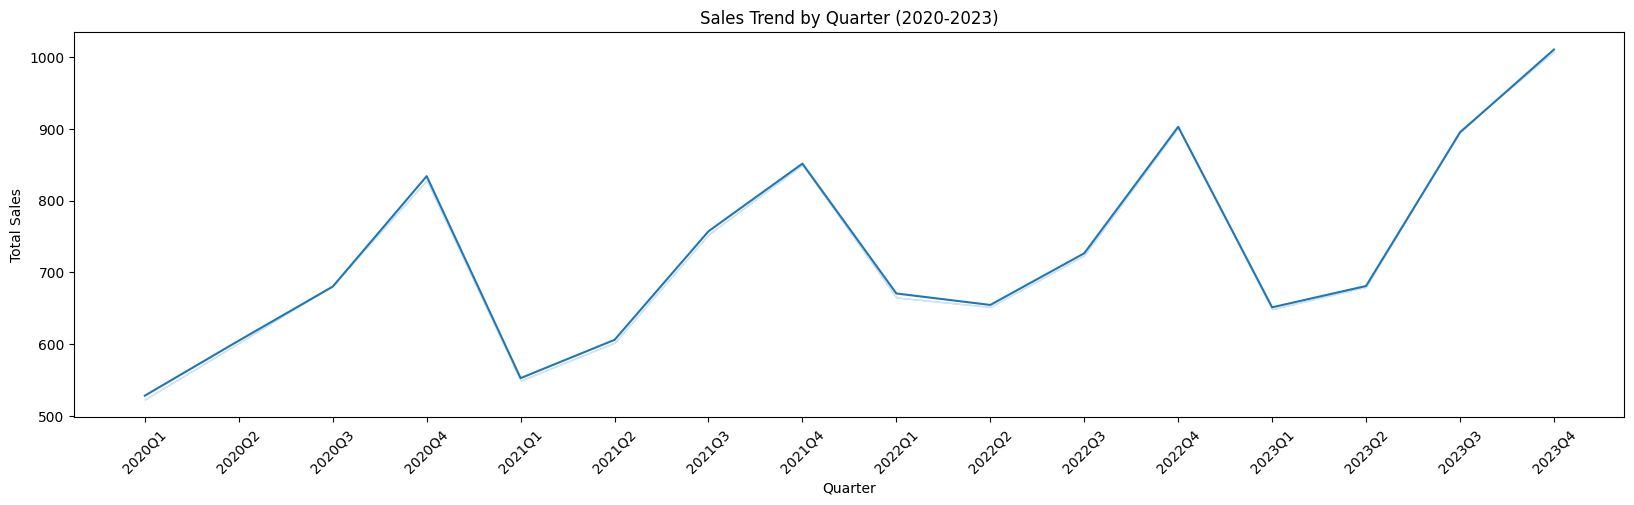

In [557]:
# Pastikan 'Order Month' sudah dalam format datetime
df_sales_timeseries['Order Month'] = df_sales_timeseries['Order Month'].dt.to_timestamp()

# Ekstrak informasi kuartal dari 'Order Month'
df_sales_timeseries['Quarter'] = df_sales_timeseries['Order Month'].dt.to_period('Q')

# Sorting DataFrame by 'Quarter' for the plot
df_sales_timeseries.sort_values(by='Quarter', inplace=True)

# Plot garis berdasarkan kuartal
plt.figure(figsize=(20,5))
sns.lineplot(
    data=df_sales_timeseries,
    x=df_sales_timeseries['Quarter'].astype(str),  # Mengonversi ke format string
    y='total_sales',
    ci=0  # membagi plot berdasarkan kategori
)

plt.title('Sales Trend by Quarter (2020-2023)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Insight:
- Setiap pada quartal 1 di setiap tahunnya mengalami penurunan.

    Pada kuartal 1 ini adalah efek setelah dari perusahan setelah dari kuartal 4, banyak memberikan promo dan penjualan besar besaran. Sehingga pada kuartal awal belum naik secara signifikan karena penjualan sudah banyak di lakukan pada kuartal 4.

- Setiap quartal 4 akan mengalami peningkatan penjualan.

    Pada kuartal ini perusahaan melakukan berbagai promo promo menarik dan bonus pada akhir tahun, sehingga ada peningkatat penjualan.

- Pola pada grafik penjualan berdasarkan quartal, bahwa penjualan mulai kuartal 1 terendah akan mulai meningkat setelah kuartal selanjutnya puncaknya pada quartal 4 dan tren nya akan naik di setiap tahunnya. 

    Setiap menuju akhir tahun perusahaan melukukan strategi seperti memberikan potongan dan bonus besar-besaran pada setiap pembelian. Sehingga penjualan meningkat setelah itu menurun lagi.

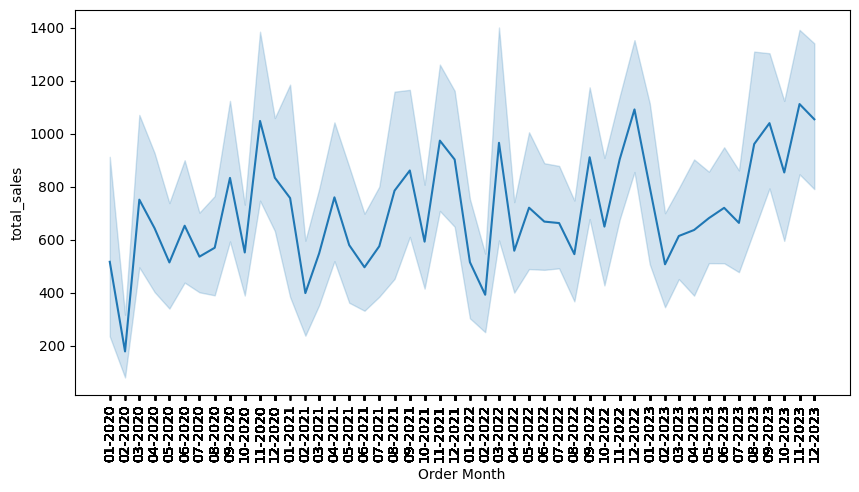

In [558]:
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=df_sales_timeseries,
    x='Order Month',
    y='total_sales'
)

plt.xticks(ticks=df_sales_timeseries['Order Month'],
           labels=[dt.strftime('%m-%Y') for dt in df_sales_timeseries['Order Month']],  # Corrected to df_1
           rotation=(90))

plt.show()


insight:

- penjualan terendah terjadi pada bulan Februari 2020
- penjualan tertinggi pada bulan November 2023
- polanya setiap pada bulan november selalu mengalami kenaikan di setiap tahunnya

**Kesimpulan dan Rekomendasi**

Untuk meningkatkan performa penjualan perusahaan AWS dengan cara?

1. Meningkatkan frekuensi pembelian dari customer, karena dari analisa cross tab jumlah frequensi transaksi memliki hubungan positif terhadap penjualan.

2. Meningkatkan jumlah per order dari customer, karena dari analisa yang sudah di lakukan. Quantity pada penjualan memiliki hubungan positif.

3. Pada industri finance memiliki penjualan tinggi, dan industri misc memiliki penjualan yang rendah.

4. Terdapat peluang peningkat penjualan pada industri energi, manufaktur, tech dan healthcare.

5. Top Customers in Each Industry:

    - Finance: Allianz, Bank of America Corp., BNP Paribas, Allstate
    - Manufacturing: Ford Motor, Siemens, Volkswagen
    - Consumer Products: Tyson Foods
    - Healthcare: AmerisourceBergen, UnitedHealth Group
6. Produk "ContactMatcher" merupakan kontributor terbesar terhadap penjualan dengan total penjualan sebesar 379,087.86.

7. Produk "FinanceHub" menempati peringkat kedua dengan total penjualan sebesar 340,935.42, diikuti oleh "Site Analytics" dengan total penjualan 330,007.05.

8. Produk dengan penjualan rendah dapat dievaluasi untuk menentukan apakah perlu ditingkatkan, dihentikan, atau mendapatkan perhatian lebih lanjut dalam strategi pemasaran.

9. Pola pada grafik penjualan berdasarkan quartal, bahwa penjualan mulai kuartal 1 terendah akan mulai meningkat setelah kuartal selanjutnya puncaknya pada quartal 4 dan tren nya akan naik di setiap tahunnya. 

Rekomendasi:

1. Dorong program loyalitas pelanggan atau promosi khusus untuk mendorong pembelian berulang dari pelanggan.

2. Pertimbangkan untuk memberikan insentif kepada pelanggan yang sering berbelanja, seperti diskon khusus atau hadiah.

3. Manfaatkan peningkatan penjualan yang dapat terjadi pada kuartal tertentu, seperti memperkuat persiapan promosi menjelang kuartal puncak.

4. Pertimbangkan untuk meningkatkan strategi pemasaran produk "ContactMatcher" yang merupakan kontributor terbesar terhadap penjualan.

5. Tinjau dan pertahankan strategi produk "FinanceHub" dan "Site Analytics" yang juga memiliki kontribusi penjualan yang signifikan.

6. Terus pantau dan analisis tren penjualan tahunan untuk memahami perubahan perilaku pelanggan.


In [559]:
df.to_csv('Analisa_saas.csv')